In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
df = pd.read_csv(r'./data/stud.csv')

In [12]:
df.iloc[:,:-1]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,71
998,female,group D,some college,standard,completed,68,78


In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_hot = ["gender","race_ethnicity","parental_level_of_education","lunch","test_preparation_course"]

column_transformer = ColumnTransformer(

  transformers=[
    ('one hot encoding',OneHotEncoder(),one_hot)
  ],
  remainder= 'passthrough'
)

In [25]:
column_transformer.fit_transform(df)

array([[ 1.,  0.,  0., ..., 72., 72., 74.],
       [ 1.,  0.,  0., ..., 69., 90., 88.],
       [ 1.,  0.,  0., ..., 90., 95., 93.],
       ...,
       [ 1.,  0.,  0., ..., 59., 71., 65.],
       [ 1.,  0.,  0., ..., 68., 78., 77.],
       [ 1.,  0.,  0., ..., 77., 86., 86.]])

In [26]:
df.iloc[:,-1]

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: writing_score, Length: 1000, dtype: int64

In [20]:
df.shape

(1000, 8)

In [7]:
for col in df.columns:
  print(col,':',df[col].unique())


gender : ['female' 'male']
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test_preparation_course : ['none' 'completed']
math_score : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score : [ 74  88  93 

<b> Exploratory Data Analysis </b>

([<matplotlib.patches.Wedge at 0x21d91431c70>,
 [Text(0.06217039140259277, 1.0982417049233053, 'No of Males'),
  Text(-0.062170295391249575, -1.0982417103584097, 'No of Females')],
 [Text(0.033911122583232416, 0.5990409299581665, '48%'),
  Text(-0.033911070213408855, -0.5990409329227688, '52%')])

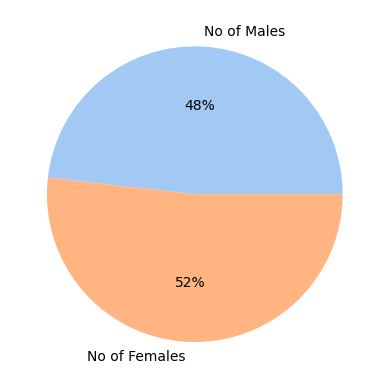

In [21]:
male_count = len(df[df['gender']=='male'])
female_count = len(df[df['gender']=='female'])

data = [male_count,female_count]
labels = ['No of Males','No of Females']

colors = sn.color_palette('pastel')[0:2]

plt.pie(data,labels=labels,colors=colors,autopct="%0.0f%%")

<b>The dataset contains 52% of information about female students and 48% about male students</b>

([<matplotlib.patches.Wedge at 0x21d914f1520>,
 [Text(1.0572819619676546, 0.3035701778795591, 'group A'),
  Text(0.44319718131346153, 1.0067652449681619, 'group B'),
  Text(-1.0188923366548048, 0.41455808556354534, 'group C'),
  Text(-0.14472094459025772, -1.0904383743233286, 'group D'),
  Text(0.9953097557049454, -0.46835722498810917, 'group E')],
 [Text(0.5766992519823569, 0.16558373338885038, '9%'),
  Text(0.24174391708006987, 0.5491446790735427, '19%'),
  Text(-0.5557594563571663, 0.22612259212557015, '32%'),
  Text(-0.07893869704923147, -0.5947845678127246, '26%'),
  Text(0.5428962303845156, -0.2554675772662413, '14%')])

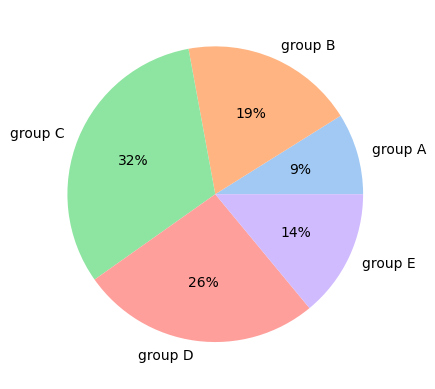

In [26]:
data = []
labels = []
datas = sorted(df['race_ethnicity'].unique(),key= lambda x:x.split(' ')[1])

for i in datas:
  data.append(len(df[df['race_ethnicity'] == i]))
  labels.append(i)

colors = sn.color_palette('pastel')[0:len(datas)]

plt.pie(data,labels=labels,colors=colors,autopct="%0.0f%%")

Here we can see, the most proportion of the data is from the group C . And We have less information about group A.

Text(0.5, 1.0, 'Parental Level Education')

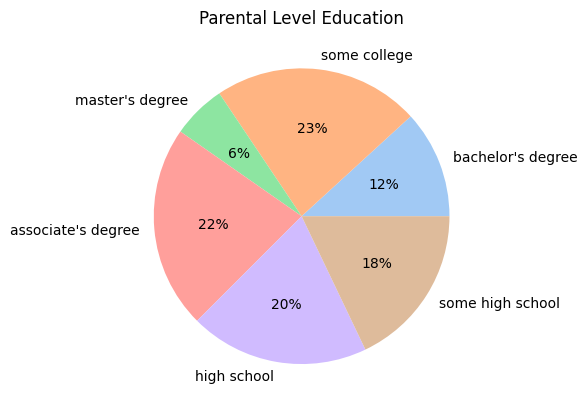

In [52]:
data = []
labels = []


for i in df['parental_level_of_education'].unique():
  data.append(len(df[df['parental_level_of_education'] == i]))
  labels.append(i)


colors = sn.color_palette('pastel')[0:len(data)]

plt.pie(data,labels=labels,colors=colors,autopct="%0.0f%%")
plt.title('Parental Level Education')

Around 38% of parents have some high school level experience and the rest 60% have acquired some formal degree

<b> Gender Wise Analysis </b>

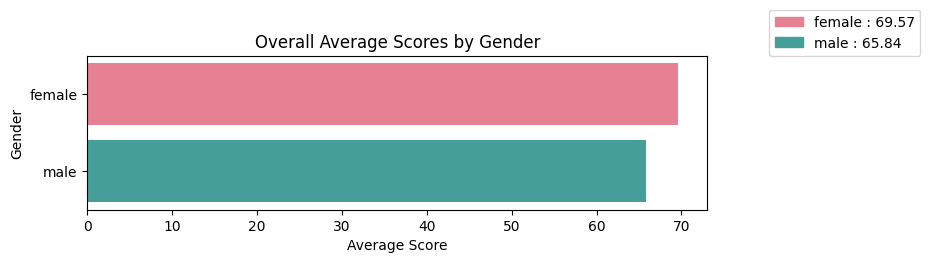

In [161]:
# Avg across all sections
import matplotlib.patches as mpatches
avg_data = []
avg_labels = []
for i in df['gender'].unique():
  temp_data = df[df['gender']==i][['math_score','reading_score','writing_score']].mean(axis = 0)
  avg_data.append(float(temp_data.mean()))
  avg_labels.append(i)

plt.figure(figsize=(8,2))
colors = sn.color_palette('husl',len(avg_labels))
bar = sn.barplot(x = avg_data,y=avg_labels,palette=colors,legend=False,hue = avg_labels)
legend_labels = [f'{avg_labels[i]} : {avg_data[i]:.2f}' for i in range(len(avg_labels))]

handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(avg_labels))]

plt.title('Overall Average Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Gender')
plt.legend(handles = handles , loc = (1.1,1))



Female students on average perform better than male students across all subjects 

C:\Users\rajad\AppData\Local\Temp\ipykernel_18032\207350101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=avg_scores, y=labels, palette='husl')


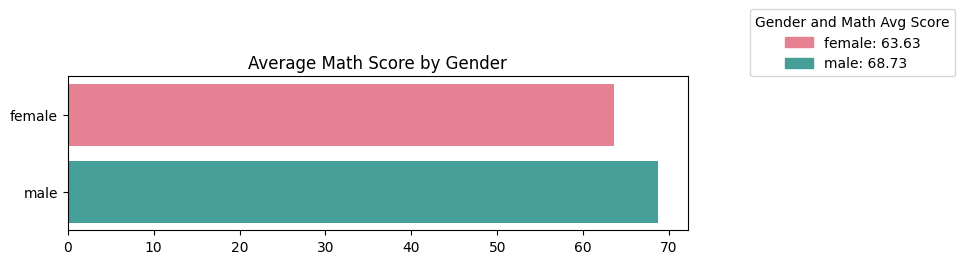

In [50]:
labels = ['female', 'male']
avg_scores = []
for k in df['gender'].unique():
    avg_score = float(df[df['gender'] == k]['math_score'].mean())
    avg_scores.append(avg_score)

plt.figure(figsize=(8, 2))  
barplot = sn.barplot(x=avg_scores, y=labels, palette='husl')
plt.title('Average Math Score by Gender')
legend_labels = [f'{label}: {score:.2f}' for label, score in zip(labels, avg_scores)]
handles = [mpatches.Patch(color=barplot.patches[i].get_facecolor(), label=legend_labels[i]) for i in range(len(labels))]
plt.legend(handles=handles, title='Gender and Math Avg Score', loc=(1.1,1))
plt.show()




Male Students perform better in math subject

C:\Users\rajad\AppData\Local\Temp\ipykernel_23084\2739759971.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=avg_scores, y=labels, palette='husl')


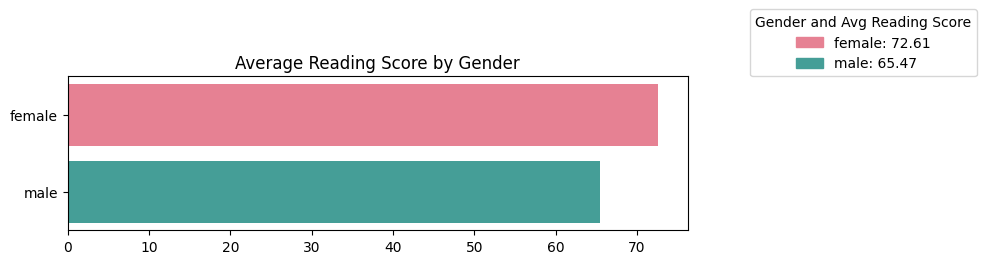

In [165]:
labels = ['female', 'male']
avg_scores = []
for k in df['gender'].unique():
    avg_score = float(df[df['gender'] == k]['reading_score'].mean())
    avg_scores.append(avg_score)

plt.figure(figsize=(8, 2))  
barplot = sn.barplot(x=avg_scores, y=labels, palette='husl')
plt.title('Average Reading Score by Gender')
legend_labels = [f'{label}: {score:.2f}' for label, score in zip(labels, avg_scores)]
handles = [mpatches.Patch(color=barplot.patches[i].get_facecolor(), label=legend_labels[i]) for i in range(len(labels))]
plt.legend(handles=handles, title='Gender and Avg Reading Score', loc=(1.1,1))
plt.show()


C:\Users\rajad\AppData\Local\Temp\ipykernel_18032\1745004086.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  barplot = sn.barplot(x=avg_scores, y=labels, hue = labels,palette= sn.color_palette('pastel'))


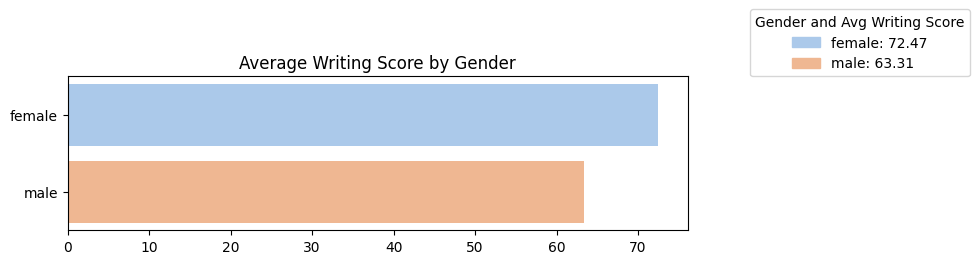

In [40]:
labels = ['female', 'male']
avg_scores = []
for k in df['gender'].unique():
    avg_score = float(df[df['gender'] == k]['writing_score'].mean())
    avg_scores.append(avg_score)

plt.figure(figsize=(8, 2))  
legend_labels = [f'{label}: {score:.2f}' for label, score in zip(labels, avg_scores)]
barplot = sn.barplot(x=avg_scores, y=labels, hue = labels,palette= sn.color_palette('pastel'))

plt.title('Average Writing Score by Gender')
handles = [mpatches.Patch(color=barplot.patches[i].get_facecolor(), label=legend_labels[i]) for i in range(len(labels))]
plt.legend( handles = handles,title='Gender and Avg Writing Score', loc=(1.1,1))
plt.show()


Female Students perform better in reading and writing sections than male students

<b>Key Observation</b>

1) Female students tend to perform better across all subjects than male students
2) Male students perform well in maths, whereas female students perform well in reading and writing subjects


Now let us understand which subject tends to be harder, where students fail more

C:\Users\rajad\AppData\Local\Temp\ipykernel_9368\3633666937.py:15: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  bar = sn.barplot(y = data ,x = subjects ,hue=subjects, palette= sn.color_palette('pastel6'))


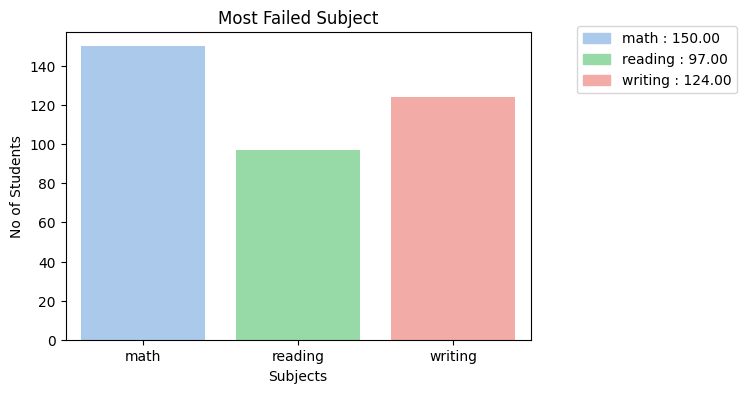

In [53]:

data = []
subjects = ['math_score','reading_score','writing_score']

for i in range(len(subjects)):
  i_data = len(df[df[subjects[i]]<=50])
  data.append(i_data)
  
plt.figure(figsize=(6,4))

subjects = [subjects[i].split('_')[0] for i in range(len(subjects))]

bar = sn.barplot(y = data ,x = subjects ,hue=subjects, palette= sn.color_palette('pastel6'))
legend_labels = [f"{subjects[i].split('_')[0]} : {data[i]:.2f}" for i in range(len(subjects))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]

plt.title('Most Failed Subject')
plt.xlabel('Subjects')
plt.ylabel('No of Students')
plt.legend(handles = handles,fontsize = 10 ,loc = (1.1,0.8))

Students fail more in math than other subjects

Why there are more failures in maths ?
<br>
Let us try to understand this situation with the help of other features

Let us start with analysing whether the students have completed the test preparation course or not
and how completing test prepartion course helps the students to score more

C:\Users\rajad\AppData\Local\Temp\ipykernel_9368\4035407456.py:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  bar = sn.barplot(y = data ,x = labels ,hue=labels, palette= sn.color_palette('pastel6'))


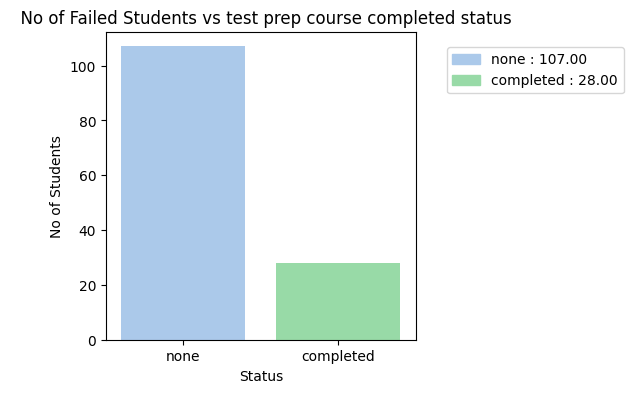

In [59]:
data = []
labels = []

for i in df['test_preparation_course'].unique():
  #Students who have failed in math
  i_data = len(df[(df['math_score']<50) & (df['test_preparation_course'] == i)])
  data.append(i_data)
  labels.append(i)
  
plt.figure(figsize=(4,4))

bar = sn.barplot(y = data ,x = labels ,hue=labels, palette= sn.color_palette('pastel6'))
legend_labels = [f"{labels[i]} : {data[i]:.2f}" for i in range(len(data))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]

plt.title('  No of Failed Students vs test prep course completed status')
plt.xlabel('Status')
plt.ylabel('No of Students')
plt.legend(handles = handles,fontsize = 10 ,loc = (1.1,0.8))

C:\Users\rajad\AppData\Local\Temp\ipykernel_9976\1977596295.py:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  bar = sn.barplot(y = data ,x = labels ,hue=labels, palette= sn.color_palette('pastel6'))


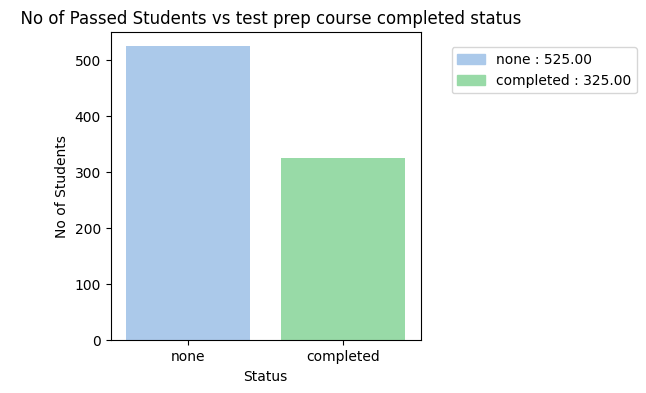

In [5]:
data = []
labels = []

for i in df['test_preparation_course'].unique():
  #Students who have failed in math
  i_data = len(df[(df['math_score']>50) & (df['test_preparation_course'] == i)])
  data.append(i_data)
  labels.append(i)
  
plt.figure(figsize=(4,4))

bar = sn.barplot(y = data ,x = labels ,hue=labels, palette= sn.color_palette('pastel6'))
legend_labels = [f"{labels[i]} : {data[i]:.2f}" for i in range(len(data))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]

plt.title('  No of Passed Students vs test prep course completed status')
plt.xlabel('Status')
plt.ylabel('No of Students')
plt.legend(handles = handles,fontsize = 10 ,loc = (1.1,0.8))

On average only <b>26%</b> of failed students have completed the test prep course and rest 74% have not completed the test prep course . In the case of passed students <b>61%</b> have completed their test prep course

<br>
So, completing test course can help the students to score more , let us dig even further by accounting all the subjects

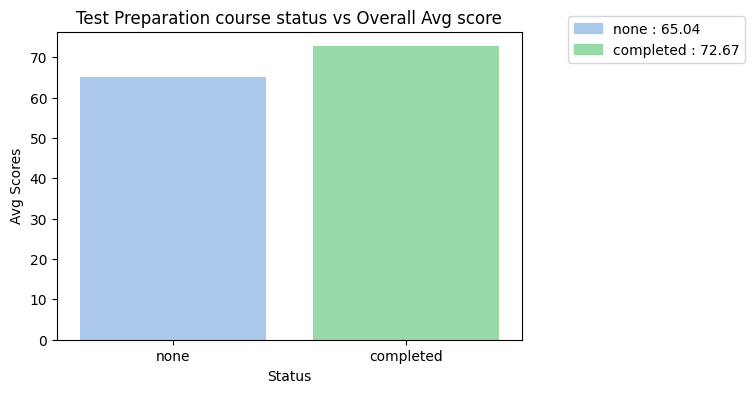

In [14]:
labels = []
data = []
for j in df['test_preparation_course'].unique():
  j_data = df[df['test_preparation_course'] == j][['math_score','reading_score','writing_score']].mean(axis = 0)
  data.append(float(j_data.mean()))
  labels.append(j)

plt.figure(figsize=(6,4))
bar = sn.barplot(y = data ,x = labels ,hue = labels, palette= sn.color_palette('pastel6')[0:len(labels)])
legend_labels = [f'{labels[i]} : {data[i]:.2f}' for i in range(len(labels))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]
plt.title('Test Preparation course status vs Overall Avg score')
plt.xlabel('Status')
plt.ylabel('Avg Scores')
plt.legend(handles = handles ,loc = (1.1,0.9) )

It is now evident that student who attend test prepartion course score higher marks across all the subjects compared to students who don't attend the test prepration course.

<br>

Let us now look into other important features that can contribute to marks scored by the students

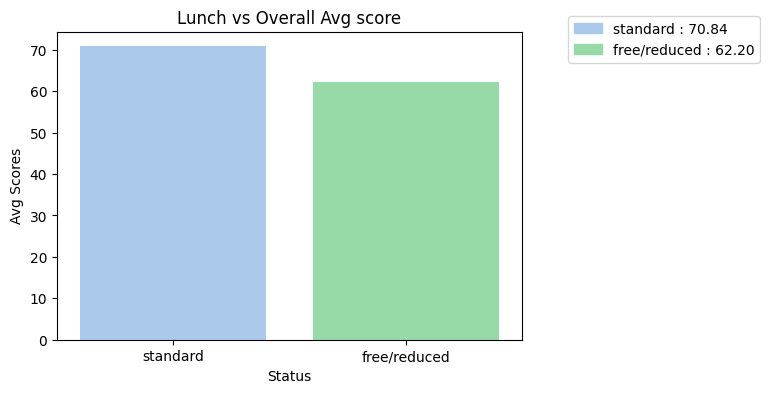

In [15]:
labels = []
data = []
for j in df['lunch'].unique():
  j_data = df[df['lunch'] == j][['math_score','reading_score','writing_score']].mean(axis = 0)
  data.append(float(j_data.mean()))
  labels.append(j)

plt.figure(figsize=(6,4))
bar = sn.barplot(y = data ,x = labels ,hue = labels, palette= sn.color_palette('pastel6')[0:len(labels)])
legend_labels = [f'{labels[i]} : {data[i]:.2f}' for i in range(len(labels))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]
plt.title('Lunch vs Overall Avg score')
plt.xlabel('Status')
plt.ylabel('Avg Scores')
plt.legend(handles = handles ,loc = (1.1,0.9) )

Here we can see students who had standard lunch tend to have higher score than students who had free/reduced lunch.
<br>

1) Additional Feature lunch play a crucial role in predicting score of the student


Now with the help of this feature let us understand why students who have completed the test prep course fail in the exam ,
does lunch feature play a role here

In [64]:
df[(df['reading_score']<50) & (df['writing_score']<50) & (df['math_score']<50) & (df['test_preparation_course'] =='completed')]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
18,male,group C,master's degree,free/reduced,completed,46,42,46
250,male,group A,some high school,standard,completed,47,49,49
296,male,group A,some high school,standard,completed,46,41,43
683,female,group C,some high school,free/reduced,completed,29,40,44
842,female,group B,high school,free/reduced,completed,23,44,36
862,male,group D,bachelor's degree,free/reduced,completed,39,42,38
902,female,group A,high school,free/reduced,completed,34,48,41
928,male,group E,associate's degree,free/reduced,completed,46,43,44


There are two important things to note

1) Most of these students have free/reduced lunch which can be a factor, for the scores they score 
2) Other than this we can also observe the feature of parental level education, most of these students parent does not have some college level education.

Now let us analyse how parental level education play a role here

C:\Users\rajad\AppData\Local\Temp\ipykernel_9976\3334306504.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sn.barplot(y = data ,x = labels , palette= sn.color_palette('pastel6'))


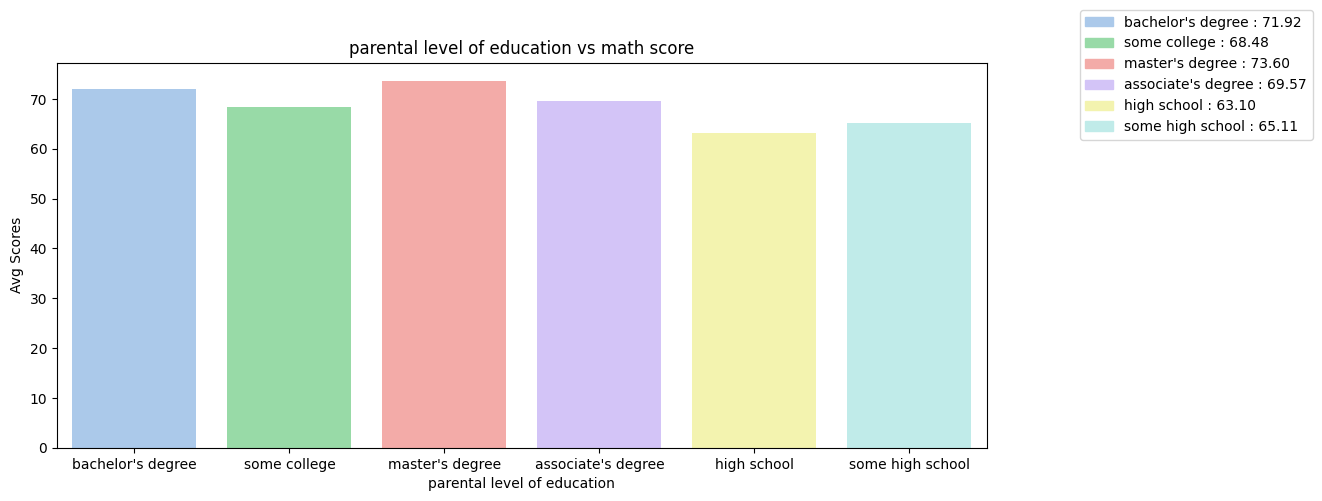

In [16]:
import matplotlib.patches as mpatches
labels = []
data = []
# fig,ax = plt.subplots(2,3)

for i in df['parental_level_of_education'].unique():
  i_data = df[df['parental_level_of_education'] == i][['math_score','reading_score','writing_score']].mean(axis =  0)
  data.append(float(i_data.mean()))
  labels.append(i)

plt.figure(figsize=(12,5))
bar = sn.barplot(y = data ,x = labels , palette= sn.color_palette('pastel6'))
legend_labels = [f'{labels[i]} : {data[i]:.2f}' for i in range(len(labels))]
handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]

plt.title('parental level of education vs math score')
plt.xlabel('parental level of education')
plt.ylabel('Avg Scores')
plt.legend(handles = handles,fontsize = 10 ,loc = (1.1,0.8))

As we can clearly see student coming from a strong educational background where parent have some undergraduate or masters degree tend to score more in comparison with parents having only high school level experience

<b> Finally, let us explore the race ethinicity feature </b>

C:\Users\rajad\AppData\Local\Temp\ipykernel_9976\2982358395.py:10: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  bar = sn.barplot(x = race_ethnicity , y= data , hue= race_ethnicity, palette= sn.color_palette('pastel6'))


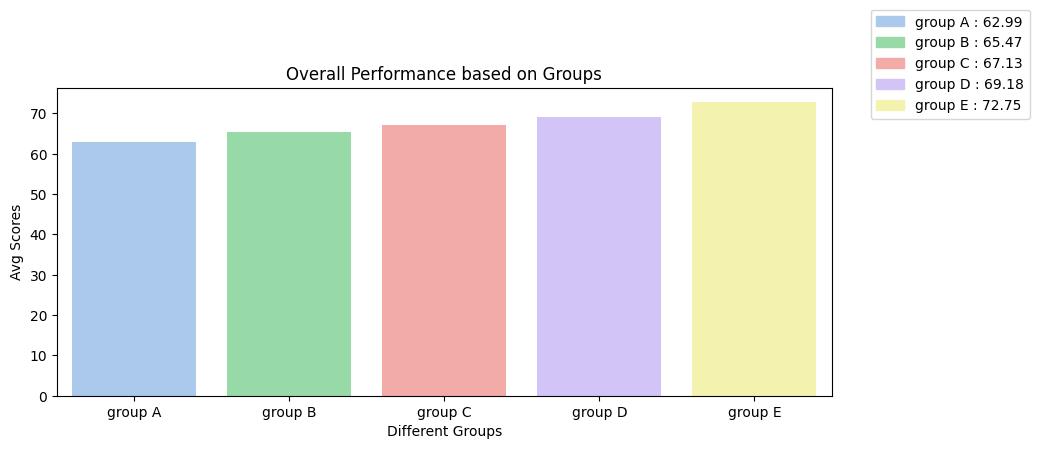

In [19]:
import matplotlib.patches as mpatches
data = []
race_ethnicity = sorted(df['race_ethnicity'].unique(),key= lambda x:x.split(' ')[1])

for i in range(len(race_ethnicity)):
  overall_avg = df[df['race_ethnicity'] == race_ethnicity[i]][['math_score','reading_score','writing_score']].mean(axis=1)
  data.append(float(overall_avg.mean()))

plt.figure(figsize = (10,4))
bar = sn.barplot(x = race_ethnicity , y= data , hue= race_ethnicity, palette= sn.color_palette('pastel6'))
legend_labels = [f'{race_ethnicity[i]} : {data[i]:.2f}' for i in range(len(data))]
plt.title('Overall Performance based on Groups')
plt.xlabel('Different Groups')
plt.ylabel('Avg Scores')
handles = [mpatches.Patch(color= bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(race_ethnicity))]
plt.legend(handles = handles , loc = (1.05, 0.9))

<b> We can see Group E tends to perform well compared to other groups </b>

Why group E performs well ,
are they from well educated background ? or
do they attend the revision class ? or
do they take standard lunch ?

([<matplotlib.patches.Wedge at 0x2a1142a0460>,
 [Text(1.0114805302222143, 0.43232758063925175, "bachelor's degree"),
  Text(-0.02468205994381944, 1.0997230541899765, 'some college'),
  Text(-0.9180306325517681, 0.6059865986113891, "master's degree"),
  Text(-0.9801069180387902, -0.49939005718226354, "associate's degree"),
  Text(0.29264065906052367, -1.0603591111810293, 'high school'),
  Text(1.01148076042502, -0.43232704205268446, 'some high school')],
 [Text(0.5517166528484804, 0.23581504398504638, '13%'),
  Text(-0.013462941787537874, 0.599848938649078, '25%'),
  Text(-0.5007439813918735, 0.3305381446971213, '6%'),
  Text(-0.5346037734757036, -0.272394576644871, '28%'),
  Text(0.15962217766937653, -0.5783776970078341, '16%'),
  Text(0.5517167784136472, -0.23581475021055515, '13%')])

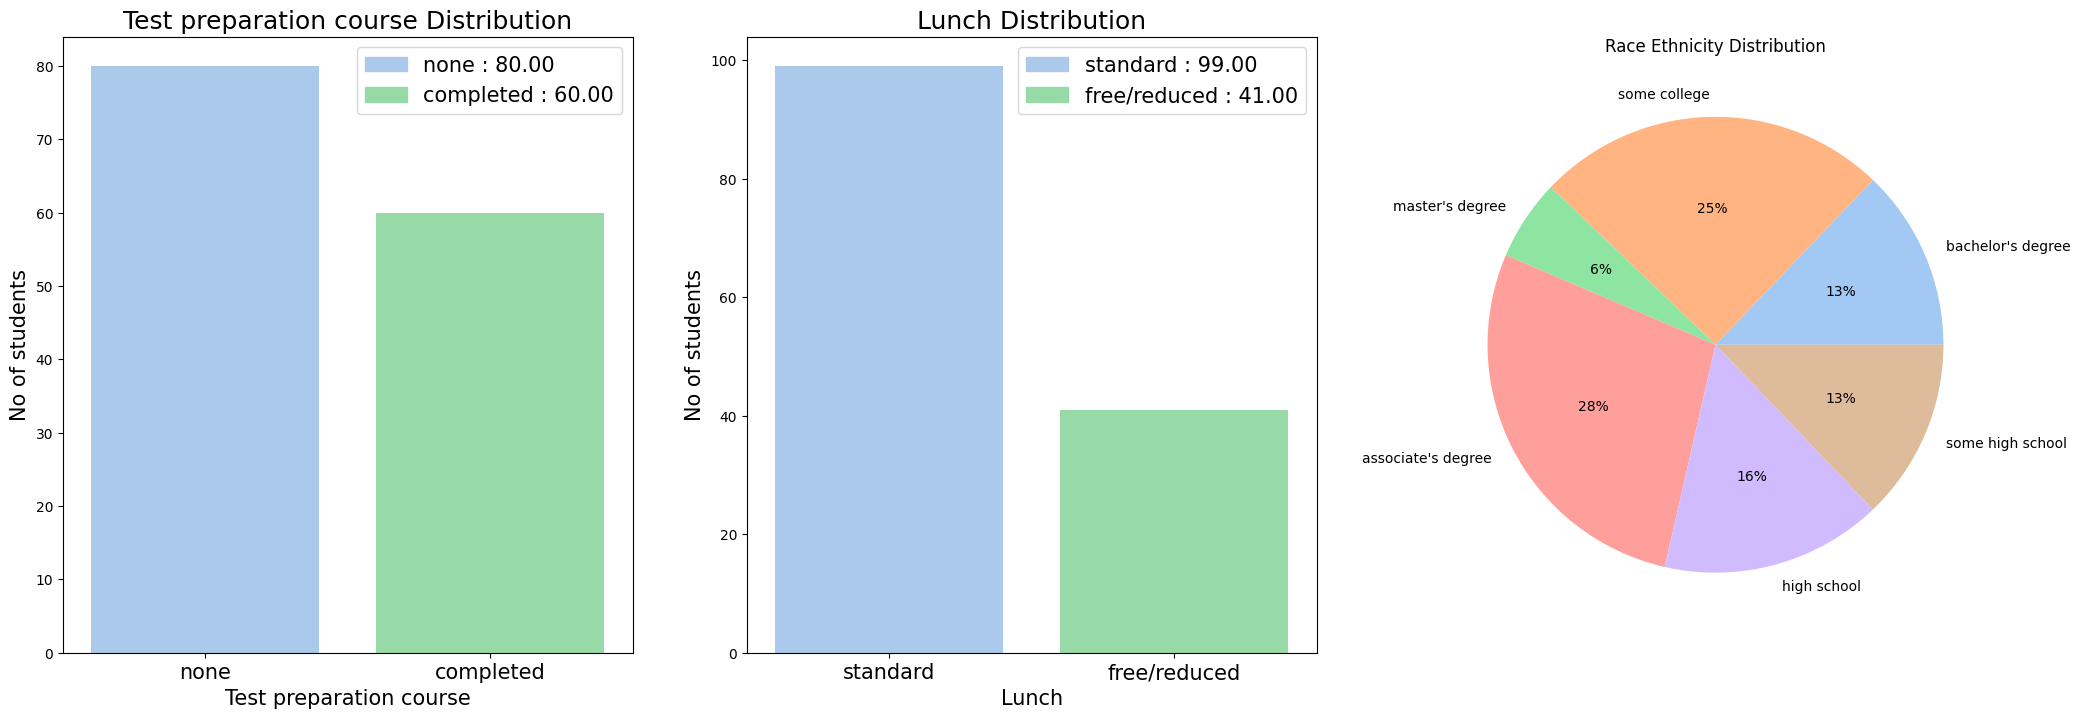

In [34]:
fig,ax = plt.subplots(1,3,figsize = (25,8))

categories = ['test_preparation_course','lunch']

pie_data = []

for i in range(len(categories)):
  labels = []
  data = []
  for j in df[categories[i]].unique():
    j_data = len(df[(df['race_ethnicity'] == 'group E') & (df[categories[i]] == j)])
    data.append(j_data)
    labels.append(j)

  bar = sn.barplot(y = data ,x = labels ,hue = labels, palette= sn.color_palette('pastel6')[0:len(labels)],ax=ax[i])
  legend_labels = [f'{labels[i]} : {data[i]:.2f}' for i in range(len(labels))]
  handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]
  ax[i].set_title(f'{categories[i].replace("_"," ").capitalize()} distribution of Group E',fontsize = 18)
  ax[i].set_xlabel(f'{categories[i].replace("_"," ").capitalize()}',fontsize = 15)
  ax[i].tick_params(axis = 'x' ,labelsize = 15)
  ax[i].set_ylabel('No of students',fontsize = 15)
  ax[i].legend(handles = handles,fontsize = 15 ,loc = 'best' )

labels = []
for i in df['parental_level_of_education'].unique():
  total_nos = len(df[(df['race_ethnicity'] == 'group E') & (df['parental_level_of_education'] == i)])
  pie_data.append(total_nos)
  labels.append(i)

colors = sn.color_palette('pastel')[0:len(labels)]
ax[2].set_title('Race Ethnicity Distribution')
ax[2].pie(labels = labels , x = pie_data , autopct= '%0.0f%%',colors = colors)



As we can see most of the students from the group have standard lunch and their parents have formal degree or have attended some college

Let us explore Group A

([<matplotlib.patches.Wedge at 0x2a1143d9160>,
 [Text(1.0027831385915371, 0.45213491012805684, "bachelor's degree"),
  Text(0.0969457762354876, 1.0957196340625182, 'some college'),
  Text(-0.6683533219548509, 0.8736726143309722, "master's degree"),
  Text(-1.04495579861408, 0.34360934059307846, "associate's degree"),
  Text(-0.7569554218868991, -0.7981343804623546, 'high school'),
  Text(0.7283167462084306, -0.824351088549269, 'some high school')],
 [Text(0.5469726210499293, 0.24661904188803097, '13%'),
  Text(0.052879514310265954, 0.5976652549431917, '20%'),
  Text(-0.36455635742991865, 0.47654869872598477, '3%'),
  Text(-0.5699758901531345, 0.18742327668713368, '16%'),
  Text(-0.4128847755746722, -0.43534602570673886, '20%'),
  Text(0.397263679750053, -0.4496460482996012, '27%')])

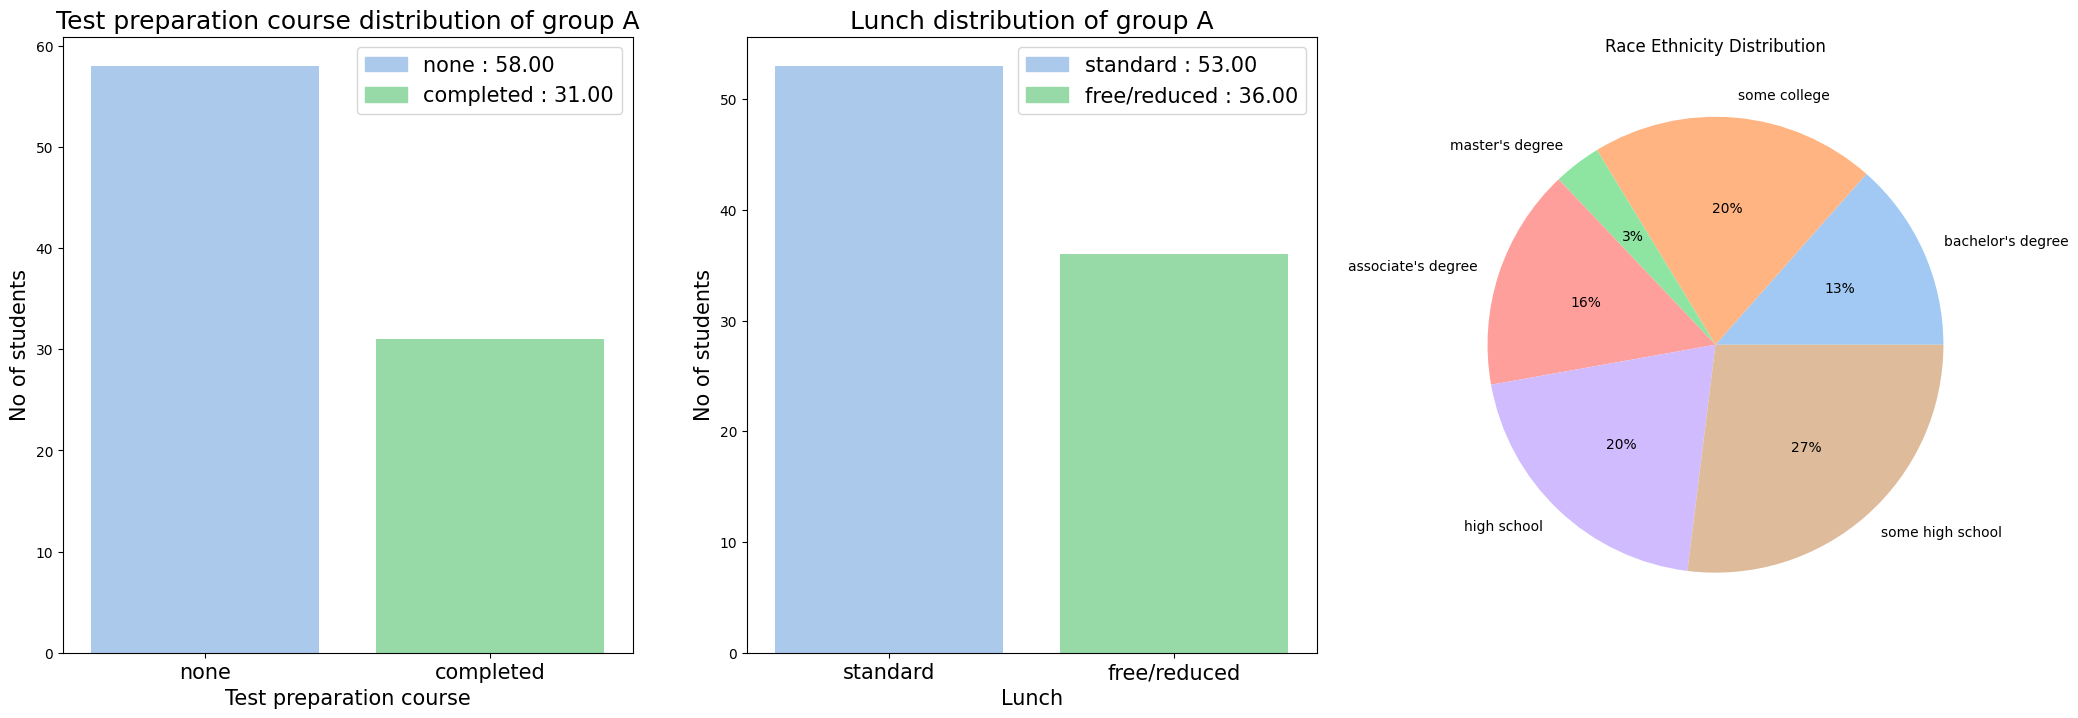

In [35]:
fig,ax = plt.subplots(1,3,figsize = (25,8))

categories = ['test_preparation_course','lunch']

pie_data = []

for i in range(len(categories)):
  labels = []
  data = []
  for j in df[categories[i]].unique():
    j_data = len(df[(df['race_ethnicity'] == 'group A') & (df[categories[i]] == j)])
    data.append(j_data)
    labels.append(j)

  bar = sn.barplot(y = data ,x = labels ,hue = labels, palette= sn.color_palette('pastel6')[0:len(labels)],ax=ax[i])
  legend_labels = [f'{labels[i]} : {data[i]:.2f}' for i in range(len(labels))]
  handles = [mpatches.Patch(color = bar.patches[i].get_facecolor(),label = legend_labels[i]) for i in range(len(legend_labels))]
  ax[i].set_title(f'{categories[i].replace("_"," ").capitalize()} distribution of group A',fontsize = 18)
  ax[i].set_xlabel(f'{categories[i].replace("_"," ").capitalize()}',fontsize = 15)
  ax[i].tick_params(axis = 'x' ,labelsize = 15)
  ax[i].set_ylabel('No of students',fontsize = 15)
  ax[i].legend(handles = handles,fontsize = 15 ,loc = 'best' )

labels = []
for i in df['parental_level_of_education'].unique():
  total_nos = len(df[(df['race_ethnicity'] == 'group A') & (df['parental_level_of_education'] == i)])
  pie_data.append(total_nos)
  labels.append(i)

colors = sn.color_palette('pastel')[0:len(labels)]
ax[2].set_title('Pare Distribution')
ax[2].pie(labels = labels , x = pie_data , autopct= '%0.0f%%',colors = colors)



We can clearly see that average between students who have reduced lunch vs total students here is 40% which is comparitively low when compared to group E where the average is 70%.
Other point to note here is parental level education , here most of the proportion of the parents have high school level qualification but in Group E most of the proportion of the parents have some college level experience this could be also be a factor.

<b> Final Conclusion </b>

1) In general, male students perform well in maths subject, while female students perform well in reading and writing
2) Comparing the average mark scored across the three subjects, we can see the female students perform well when compared to male students
3) Students who have completed test prepartion course score higher marks, than the students who have not completed the course
4) Lunch plays a crucial role here, students who take standard luch perform well than the students who take free/reduced lunch
5) Parental level education also plays a role here, students parent who have some college level experience score higher marks than the students parent who have some high school level education
6) Group E tends to perform the best, and Group A performs the worst